In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
import numpy as np



# -----------------------------
# 1) 데이터 준비
# -----------------------------


Matplotlib is building the font cache; this may take a moment.


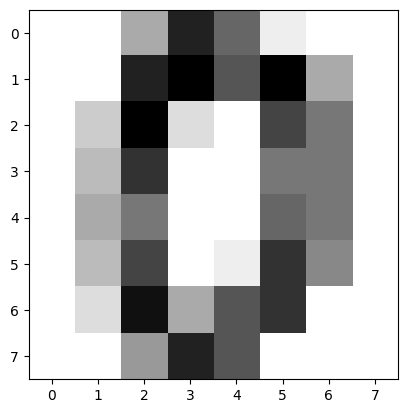

In [8]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------


import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')


In [9]:
# 이미지 평탄화

n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))


In [10]:
# 훈련과 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(
data, digits.target, test_size=0.2)



In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((1437, 64), (360, 64), (1437,), (360,))

In [12]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)



In [13]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [14]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [15]:
y_test

array([0, 8, 9, 0, 8, 3, 6, 4, 3, 3, 9, 1, 0, 2, 5, 0, 6, 4, 3, 3, 7, 8,
       6, 9, 4, 8, 6, 0, 8, 9, 2, 4, 7, 3, 6, 3, 1, 7, 3, 2, 3, 3, 6, 5,
       2, 1, 0, 8, 5, 9, 2, 7, 3, 4, 4, 4, 0, 4, 3, 8, 5, 0, 8, 0, 2, 2,
       2, 0, 4, 2, 5, 0, 4, 6, 1, 2, 7, 2, 9, 5, 4, 9, 6, 6, 7, 2, 0, 4,
       8, 1, 5, 5, 0, 0, 9, 0, 3, 7, 7, 7, 6, 6, 2, 3, 5, 7, 5, 3, 7, 3,
       8, 1, 2, 7, 8, 4, 1, 7, 3, 9, 7, 1, 8, 6, 5, 8, 5, 3, 3, 2, 4, 2,
       0, 9, 1, 4, 6, 1, 9, 5, 0, 7, 1, 5, 9, 9, 4, 8, 1, 2, 2, 8, 5, 8,
       4, 0, 0, 8, 5, 8, 6, 5, 2, 0, 6, 9, 4, 8, 2, 0, 1, 0, 6, 8, 6, 6,
       8, 5, 2, 9, 9, 0, 3, 0, 4, 9, 3, 0, 7, 5, 0, 8, 0, 7, 1, 0, 0, 3,
       0, 2, 0, 8, 5, 8, 6, 3, 1, 1, 5, 0, 6, 1, 2, 9, 7, 9, 6, 7, 2, 1,
       9, 8, 9, 0, 0, 7, 7, 0, 5, 8, 2, 0, 2, 4, 5, 9, 4, 7, 3, 2, 8, 4,
       2, 4, 3, 9, 2, 9, 7, 5, 8, 4, 0, 7, 1, 6, 4, 2, 1, 3, 2, 6, 6, 5,
       1, 8, 2, 4, 9, 5, 4, 4, 5, 9, 5, 5, 7, 3, 3, 9, 9, 4, 5, 0, 5, 6,
       4, 9, 4, 5, 2, 3, 5, 2, 4, 1, 3, 3, 5, 1, 2,

In [16]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))


=== DT Test Accuracy ===
Decision Tree : 0.8583
[[40  0  0  0  1  1  0  0  1  0]
 [ 0 18  3  0  0  1  0  0  2  1]
 [ 0  1 36  5  0  0  0  0  3  0]
 [ 0  2  0 32  0  1  0  0  0  0]
 [ 1  1  0  0 30  2  2  0  2  0]
 [ 0  0  1  1  1 37  1  0  0  0]
 [ 1  1  0  0  0  0 24  0  0  0]
 [ 0  1  0  0  1  1  0 28  0  2]
 [ 0  2  2  2  0  0  0  0 31  1]
 [ 1  0  0  2  0  0  0  0  0 33]]
=== RF Test Accuracy ===
Random Forest : 0.9917
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  1]
 [ 0  0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0  0  0 36]]
=== LR Test Accuracy ===
Logistic Reg. : 0.9528
[[42  0  0  0  0  0  1  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0]
 [ 0  1 44  0  0  0  0  0  0  0]
 [ 0  0  1 31  0  2  0  0  0  1]
 [ 1  1  0  0 35  0  1  0  0  0]
 [ 0  0  0  0  0 41  0  0  0 